# Puzzle Generation in COLUMBUS

In this notebook, we will show you how to generate your own puzzles for either **compound words** or **phrases**. 

### Setup
To get started, run the setup as shown below.

In [1]:
# Add root folder to allow module imports
import sys
sys.path.append("../")

In [2]:
# Import Python modules
import json
import random

# Import necessary code from COLUMBUS
from puzzles.parsers.CompoundRebusGraphParser import CompoundRebusGraphParser
from puzzles.parsers.PhraseRebusGraphParser import PhraseRebusGraphParser
from puzzles.RebusImageConverter import RebusImageConverter

# Import utility functions
from notebooks.notebook_util import load_inputs_in_columbus

## Generating puzzles from COLUMBUS
To highlight the overall process in converting compounds/phrases to rebus images, we present a few examples with the inputs that can be found in COLUMBUS. The pipeline is split into two phases: generating a graph from a compound/phrase, and converting this graph into an image of a rebus puzzle.

**NOTE**: some of the example rebus puzzles generated below are not present in the final version of COLUMBUS due to manual filtering. This occurs when the only rule used in a puzzle is converting textual elements to an icon.

### Components
The three most important components in this pipeline are as follows:
- Compound graph generator: converts a compound word to a graph
- Phrase graph generator: converts a phrase to a graph
- Rebus image converter: converts a graph to an image

In [3]:
# Instantiate a RebusImageConverter object to convert rebus graphs to images
compound_parser = CompoundRebusGraphParser()
phrase_parser = PhraseRebusGraphParser() 
image_generator = RebusImageConverter()   

### Loading the data

We also shuffle the data using a set seed (feel free to change this seed to generate a different subset of puzzles later).

In [4]:
# Load all compounds/phrases in COLUMBUS (see notebook_utils.py)
compounds_in_columbus, phrases_in_columbus = load_inputs_in_columbus()

# Set seed (change this to generate a different subset of puzzles)
seed = 50
random.seed(seed)

# Shuffle inputs using seed
random.shuffle(compounds_in_columbus)
random.shuffle(phrases_in_columbus)

### Generating rebus images from compounds

To convert a compound word to a rebus image, it must first be converted to a graph. To accomplish this, the compound word must be split into its constituent words (e.g., the compound "aftereffect" has constituent words "after" and "effect"). Additionally, we also need a flag to denote its plurality (this will be used to encode *repetition* rules). The following code will generate all the possible graphs for a given compound and print it. It will then render the corresponding image from that graph.

=== GRAPH 1 FOR COMPOUND: "MIDBRAIN" ===
Graph: {'answer': 'midbrain'}
Node 1: {'text': '🧠', 'repeat': 1, 'highlight': 'middle', 'icon': {'brain': '🧠'}}



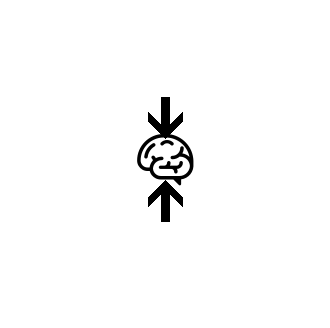

=== GRAPH 2 FOR COMPOUND: "MIDBRAIN" ===
Graph: {'answer': 'midbrain'}
Node 1: {'text': 'MID', 'repeat': 1}
Node 2: {'text': '🧠', 'repeat': 1, 'icon': {'brain': '🧠'}}
Node 1 --(NEXT-TO)-> Node 2



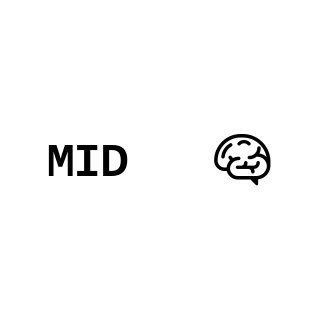


=== GRAPH 1 FOR COMPOUND: "AFTERGLOWS" ===
Graph: {'answer': 'afterglows'}
Node 1: {'text': 'GLOW', 'repeat': 2, 'highlight': 'after'}



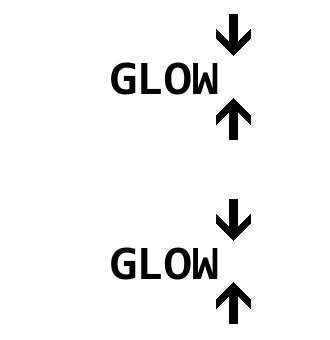


=== GRAPH 1 FOR COMPOUND: "MIDDLEMAN" ===
Graph: {'answer': 'middleman'}
Node 1: {'text': '👨', 'repeat': 1, 'highlight': 'middle', 'icon': {'man': '👨'}}



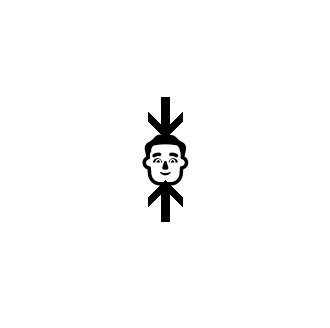

=== GRAPH 2 FOR COMPOUND: "MIDDLEMAN" ===
Graph: {'answer': 'middleman'}
Node 1: {'text': 'MIDDLE', 'repeat': 1}
Node 2: {'text': '👨', 'repeat': 1, 'icon': {'man': '👨'}}
Node 1 --(NEXT-TO)-> Node 2



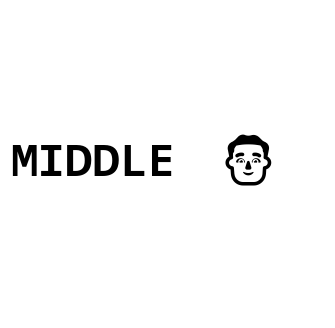

In [5]:
# Loop over the first three compounds and convert them to rebus images
for compound in compounds_in_columbus[:3]:
    # Get constituent words of the compound, its plurality status, and the complete compound word 
    # (although this last one isn't necessary to generate a graph)
    word_1 = compound["word_1"]
    word_2 = compound["word_2"]
    is_plural = compound["is_plural"]
    compound_word = compound["compound"]

    # Convert compound to graph by passing in the constituent words and if it is plural or not
    graphs = compound_parser.parse(word_1, word_2, is_plural)
    for i, graph in enumerate(graphs):
        print(f"=== GRAPH {i+1} FOR COMPOUND: \"{compound_word.upper()}\" ===")
        print(graph)

        # Convert graph to rebus image
        image_generator.generate(graph, show=True)
    print("")

### Generating rebus images from phrases

Alternatively, rebus images can also be generated from phrases. This only requires passing the phrase as input (no splitting or plurality required).

=== GRAPH 1 FOR PHRASE: "COME INTO ONE'S OWN" ===
Graph: {'answer': "come into one's own"}
Node 1: {'text': 'COME', 'repeat': 1}
Node 2: {'text': '1111', 'repeat': 1, 'sound': {"one's": '1111'}}
Node 3: {'text': 'OWN', 'repeat': 1}
Node 1 --(INSIDE)-> Node 2
Node 2 --(NEXT-TO)-> Node 3



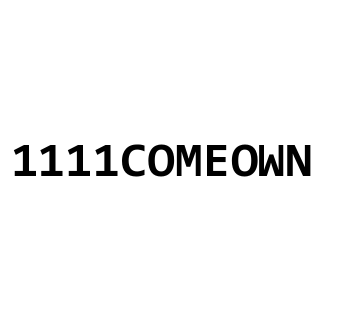


=== GRAPH 1 FOR PHRASE: "ROLL IN WEALTH" ===
Graph: {'answer': 'roll in wealth'}
Node 1: {'text': 'ROLL', 'repeat': 1}
Node 2: {'text': 'WEALTH', 'repeat': 1, 'icon': {'wealth': '💵'}}
Node 1 --(INSIDE)-> Node 2



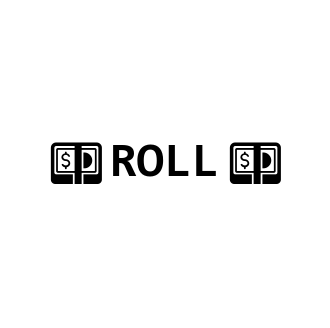


=== GRAPH 1 FOR PHRASE: "PUT OUT A FIRE" ===
Graph: {'answer': 'put out a fire'}
Node 1: {'text': 'PUT', 'repeat': 1}
Node 2: {'text': 'FIRE', 'repeat': 1, 'icon': {'fire': '🔥'}}
Node 1 --(OUTSIDE)-> Node 2



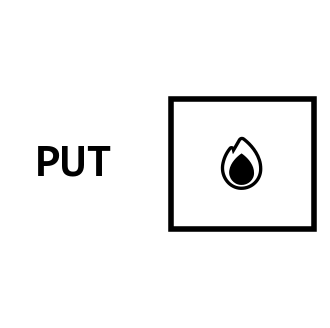

In [6]:
# Loop over the first three phrases and convert them to rebus images
for phrase in phrases_in_columbus[:3]:
    # Convert phrase to graph by just passing the phrase
    graphs = phrase_parser.parse(phrase)
    for i, graph in enumerate(graphs):
        print(f"=== GRAPH {i+1} FOR PHRASE: \"{phrase.upper()}\" ===")
        print(graph)

        # Convert graph to rebus image
        image_generator.generate(graph, show=True)
    print("")

## Generating your own puzzles

We now give you an opportunity to play around with the rebus image generator itself. You can change the inputs for the input compound words (1st code block) and phrases (2nd code block) shown below.

**NOTE**: for certain inputs, no image will rendered. This is due to the heuristics used for image generation, which is implemented in an effort to limit complexity and generate as many non-broken rebuses as possible. For these restricted inputs, the graph will be printed, but the image will not be rendered (see the last graph for the phrase "come down to earth" shown below).

=== GRAPH 1 FOR COMPOUND: "AFTEREFFECT" ===
Graph: {'answer': 'aftereffect'}
Node 1: {'text': 'EFFECT', 'repeat': 2, 'highlight': 'after'}



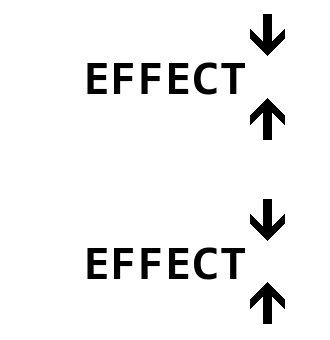

In [7]:
# Change these inputs to generate a different puzzle of your choice
word_1 = "after"   # First constituent word
word_2 = "effect"  # Second constituent word
is_plural = True   # Flag to denote plurality

# Generate all possible graphs from the above inputs
compound_graphs = compound_parser.parse(word_1, word_2, is_plural)

# Loop over each generated graph, print it, and convert to an image that will be displayed
for i, graph in enumerate(compound_graphs):
    print(f"=== GRAPH {i+1} FOR COMPOUND: \"{word_1.upper()}{word_2.upper()}\" ===")
    print(graph)
    image_generator.generate(graph, show=True)

=== GRAPH 1 FOR PHRASE: "COME DOWN TO EARTH" ===
Graph: {'answer': 'come down to earth'}
Node 1: {'text': 'COME', 'repeat': 1, 'direction': 'down'}
Node 2: {'text': '🌍', 'repeat': 2, 'sound': {'to': ['2']}, 'icon': {'earth': '🌍'}}
Node 1 --(NEXT-TO)-> Node 2



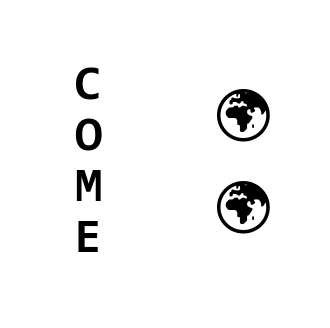

=== GRAPH 2 FOR PHRASE: "COME DOWN TO EARTH" ===
Graph: {'answer': 'come down to earth'}
Node 1: {'text': 'COME', 'repeat': 1, 'direction': 'down'}
Node 2: {'text': '2', 'repeat': 1, 'sound': {'to': '2'}}
Node 3: {'text': '🌍', 'repeat': 1, 'icon': {'earth': '🌍'}}
Node 1 --(NEXT-TO)-> Node 2
Node 2 --(NEXT-TO)-> Node 3



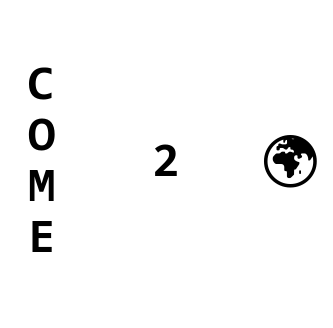

=== GRAPH 3 FOR PHRASE: "COME DOWN TO EARTH" ===
Graph: {'answer': 'come down to earth'}
Node 1: {'text': 'COME', 'repeat': 1}
Node 2: {'text': '↓', 'repeat': 1, 'icon': {'down': '↓'}}
Node 3: {'text': '🌍', 'repeat': 2, 'sound': {'to': ['2']}, 'icon': {'earth': '🌍'}}
Node 1 --(NEXT-TO)-> Node 2
Node 2 --(NEXT-TO)-> Node 3



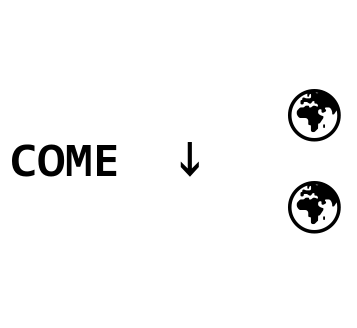

=== GRAPH 4 FOR PHRASE: "COME DOWN TO EARTH" ===
Graph: {'answer': 'come down to earth'}
Node 1: {'text': 'COME', 'repeat': 1}
Node 2: {'text': '↓', 'repeat': 1, 'icon': {'down': '↓'}}
Node 3: {'text': '2', 'repeat': 1, 'sound': {'to': '2'}}
Node 4: {'text': '🌍', 'repeat': 1, 'icon': {'earth': '🌍'}}
Node 1 --(NEXT-TO)-> Node 2
Node 2 --(NEXT-TO)-> Node 3
Node 3 --(NEXT-TO)-> Node 4



In [8]:
# Change this phrase to generate a different puzzle of your choice
phrase = "come down to earth"

# Generate all possible graphs from the above phrase
phrase_graphs = phrase_parser.parse(phrase)

# Loop over each generated graph, print it, and convert to an image that will be displayed
for i, graph in enumerate(phrase_graphs):
    print(f"=== GRAPH {i+1} FOR PHRASE: \"{phrase.upper()}\" ===")
    print(graph)
    image_generator.generate(graph, show=True)